In [1]:
import pandas as pd
import numpy as np

# PLOTTING

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [8]:
def plot_accuracy_matrix(d, score, vmin=.5, vmax=1, cmap='YlGn', **kwargs):


    if score == 'accuracy':
        s = 'accuracy_test'
    elif score == 'log_loss':
        s = 'log_loss_test'
    elif score == 'mcc':
        s = 'mcc_test'
    elif score =='f1':
        s = 'f1_test'
    
    grouped = d.groupby(
        ['ds_id', 'statistic_id', 'part_id', 'classifier_id', 'group_a', 'group_b']).mean()

    # create pivot table of avg performance
    p = grouped.pivot_table(index='group_a', columns='group_b', values=s, fill_value=0)
    index = p.index.union(p.columns)
    p = p.reindex(index=index, columns=index, fill_value=0)

    mask = np.zeros_like(p, dtype=np.bool)
    mask[np.tril_indices_from(mask)] = True

    return sns.heatmap(p, mask=mask, cmap=cmap, vmin=vmin, vmax=vmax, center=(vmax + vmin)/2., square=True, linewidths=.5,
                       cbar_kws={"shrink": .5},  annot_kws={"fontsize": 13}, **kwargs)

In [3]:
df = pd.read_csv("./data/classification/pairwise_classification_performances.csv")

In [4]:
d_dm = df[(df['classifier_id'] == 1) &  (df['part_id'] == 1) & (df['statistic_id'] == 5)] 
d_morph = df[(df['classifier_id'] == 1) &  (df['part_id'] == 1) & (df['statistic_id'] == 80)] 
d_combined = df[(df['classifier_id'] == 1) & (df['part_id'] == 1) & (df['statistic_id'] == 90)]

d_pers = df[(df['classifier_id'] == 1) & (df['part_id'] == 1) & (df['statistic_id'] == 78)]
d_pers_dm_combined = df[(df['classifier_id'] == 1) & (df['part_id'] == 1) & (df['statistic_id'] == 108)]

In [6]:
sns.set_context("poster")

### XZ density maps

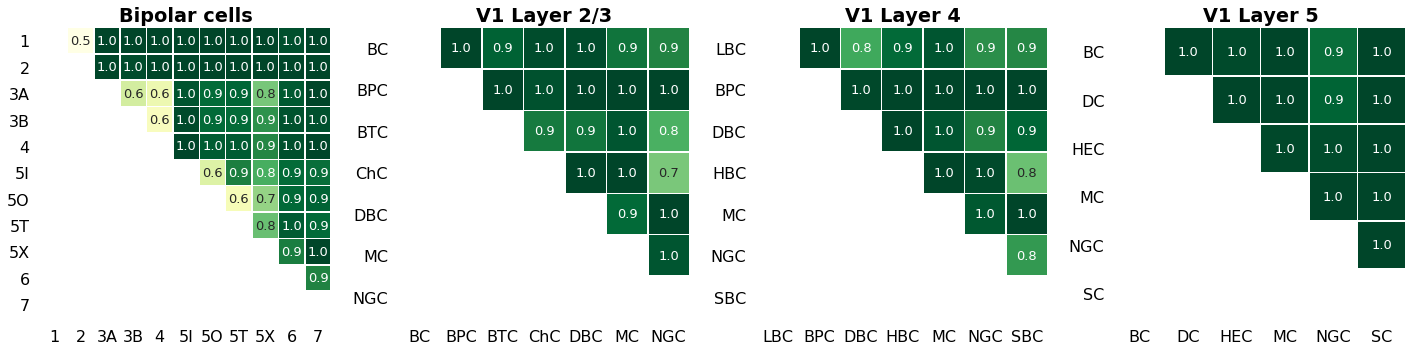

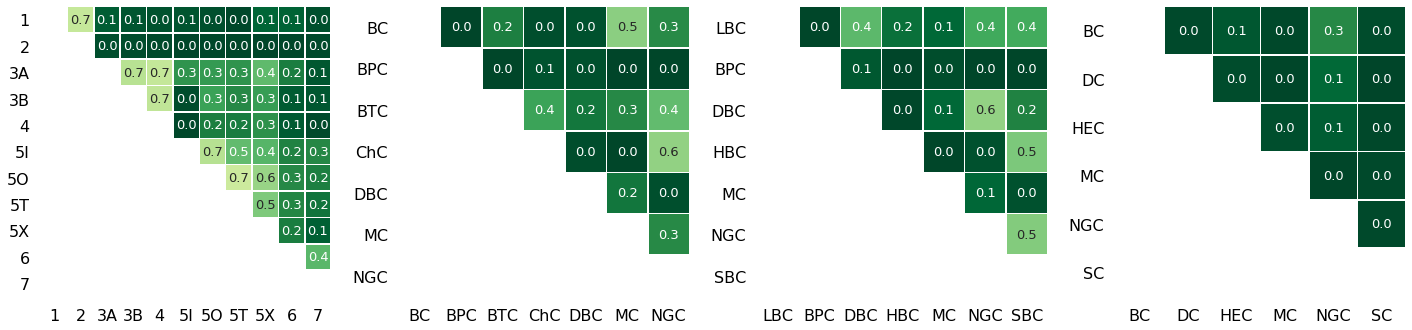

In [9]:
plt.figure(figsize=(20,5))
D = d_dm

## plot avg test accuracies
for k,i in enumerate([(1, 'Bipolar cells') ,(3,'V1 Layer 2/3'),(5,'V1 Layer 4'),(4, 'V1 Layer 5')]):
    
    plt.subplot(1,4,k+1)
    ds_idx = D['ds_id'] == i[0]
    plot_accuracy_matrix(D[ds_idx],score='accuracy', vmin=0.5, annot=True, 
                         fmt='.1f', cbar=False)
    x_labels = plt.gca().get_xticklabels()
    if i[0] == 1:
        x_labels = [s.get_text().replace("CBC","") for s in x_labels]
        plt.gca().set_xticklabels(x_labels, rotation=0)
        plt.gca().set_yticklabels(x_labels)
    elif i[0] == 5:
        x_labels = [s.get_text().replace("HEC", "HBC").replace("SC","SBC") for s in x_labels]
        x_labels[0] = 'LBC'
        plt.gca().set_xticklabels(x_labels)
        plt.gca().set_yticklabels(x_labels, rotation=0)
    else:
        plt.gca().set_xticklabels(x_labels)
        plt.gca().set_yticklabels(x_labels, rotation=0)
    plt.gca().tick_params(axis='both', which='both', length=0)
    
    plt.title(i[1], weight='bold')
plt.tight_layout()


## plot avg test log-loss
plt.figure(figsize=(20,5))
for k,i in enumerate([1,3,5,4]):
    
    plt.subplot(1,4,k+1)
    ds_idx = D['ds_id'] == i
    plot_accuracy_matrix(D[ds_idx],score='log_loss', vmin=0, cmap='YlGn_r', annot=True,
                         fmt='.1f' , cbar=False)
    x_labels = plt.gca().get_xticklabels()
    if i == 1:
        x_labels = [s.get_text().replace("CBC","") for s in x_labels]
        plt.gca().set_xticklabels(x_labels, rotation=0)
        plt.gca().set_yticklabels(x_labels)
    elif i == 5:
        x_labels = [s.get_text().replace("HEC", "HBC").replace("SC","SBC") for s in x_labels]
        x_labels[0] = 'LBC'
        plt.gca().set_xticklabels(x_labels)
        plt.gca().set_yticklabels(x_labels, rotation=0)
    else:
        plt.gca().set_xticklabels(x_labels)
        plt.gca().set_yticklabels(x_labels, rotation=0)
    plt.gca().tick_params(axis='both', which='both', length=0)
plt.tight_layout()


### Morphometric statistics

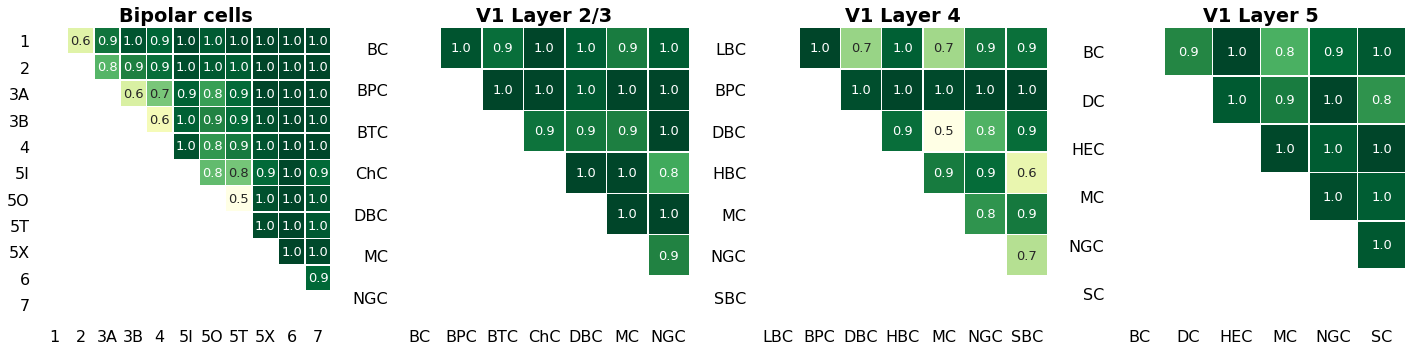

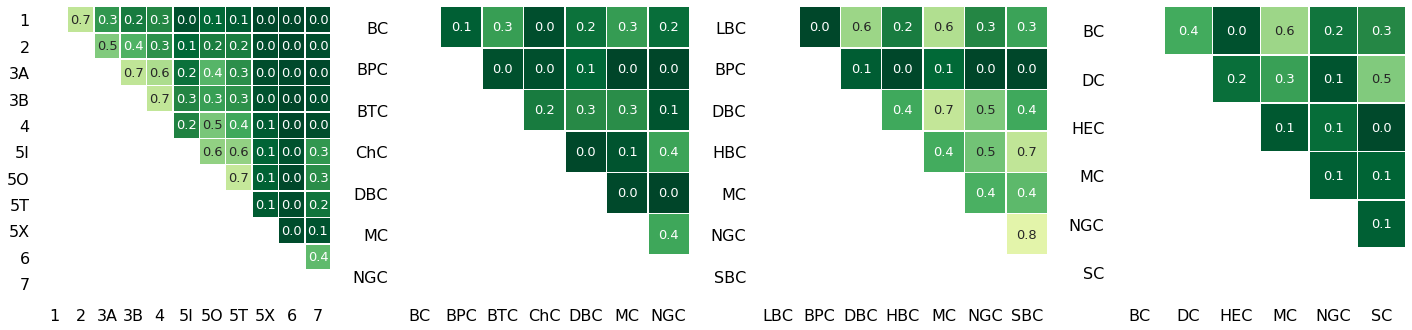

In [10]:
plt.figure(figsize=(20,5))
D = d_morph

## plot avg test accuracies
for k,i in enumerate([(1, 'Bipolar cells') ,(3,'V1 Layer 2/3'),(5,'V1 Layer 4'),(4, 'V1 Layer 5')]):
    
    plt.subplot(1,4,k+1)
    ds_idx = D['ds_id'] == i[0]
    plot_accuracy_matrix(D[ds_idx], score='accuracy',vmin=0.5, annot=True,
                         fmt='.1f',cbar=False)
    x_labels = plt.gca().get_xticklabels()
    if i[0] == 1:
        x_labels = [s.get_text().replace("CBC","") for s in x_labels]
        plt.gca().set_xticklabels(x_labels,rotation=0)
        plt.gca().set_yticklabels(x_labels, rotation=0)
    elif i[0] == 5:
        x_labels = [s.get_text().replace("HEC", "HBC").replace("SC","SBC") for s in x_labels]
        x_labels[0] = 'LBC'
        plt.gca().set_xticklabels(x_labels)
        plt.gca().set_yticklabels(x_labels, rotation=0)
    else:
        plt.gca().set_xticklabels(x_labels)
        plt.gca().set_yticklabels(x_labels, rotation=0)
    plt.gca().tick_params(axis='both', which='both', length=0)
    plt.title(i[1], weight='bold')
plt.tight_layout()

## plot avg test log-loss
plt.figure(figsize=(20,5))
for k,i in enumerate([1,3,5,4]):
    
    plt.subplot(1,4,k+1)
    ds_idx = D['ds_id'] == i
    plot_accuracy_matrix(D[ds_idx], score='log_loss', vmin=0, cmap='YlGn_r', annot=True, 
                        fmt='.1f', cbar=False)
    x_labels = plt.gca().get_xticklabels()
    if i == 1:
        x_labels = [s.get_text().replace("CBC","") for s in x_labels]
        plt.gca().set_xticklabels(x_labels, rotation=0)
        plt.gca().set_yticklabels(x_labels,rotation=0)
    elif i == 5:
        x_labels = [s.get_text().replace("HEC", "HBC").replace("SC","SBC") for s in x_labels]
        x_labels[0] = 'LBC'
        plt.gca().set_xticklabels(x_labels)
        plt.gca().set_yticklabels(x_labels, rotation=0)
            
    else:
        plt.gca().set_xticklabels(x_labels)
        plt.gca().set_yticklabels(x_labels, rotation=0)
    plt.gca().tick_params(axis='both', which='both', length=0)
plt.tight_layout()


### z-projection based 2D persistence images

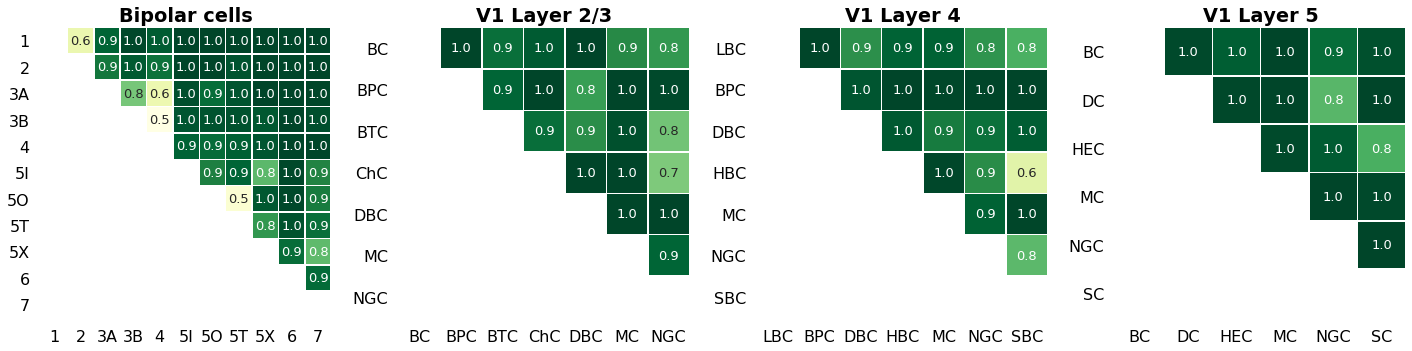

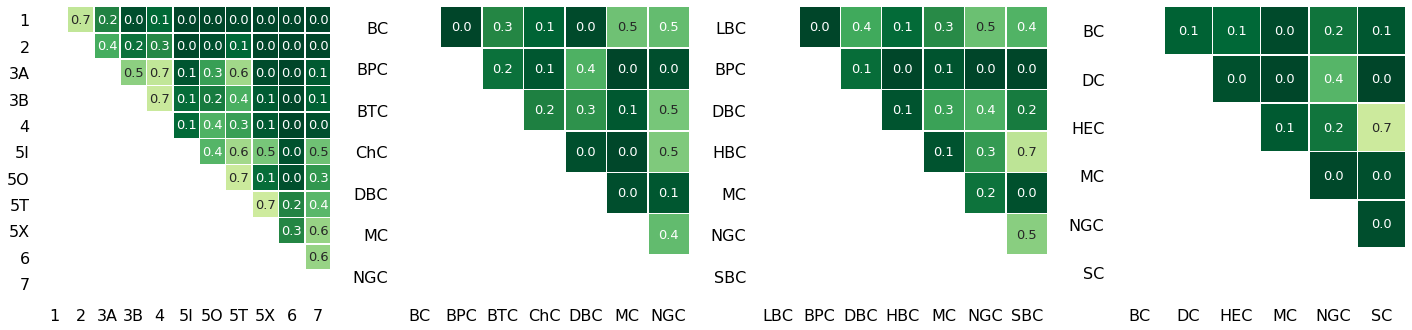

In [11]:
plt.figure(figsize=(20,5))
D = d_pers

## plot avg test accuracies
for k,i in enumerate([(1, 'Bipolar cells') ,(3,'V1 Layer 2/3'),(5,'V1 Layer 4'),(4, 'V1 Layer 5')]):
    
    plt.subplot(1,4,k+1)
    ds_idx = D['ds_id'] == i[0]
    plot_accuracy_matrix(D[ds_idx], score='accuracy',vmin=0.5, annot=True,
                         fmt='.1f',cbar=False)
    x_labels = plt.gca().get_xticklabels()
    if i[0] == 1:
        x_labels = [s.get_text().replace("CBC","") for s in x_labels]
        plt.gca().set_xticklabels(x_labels,rotation=0)
        plt.gca().set_yticklabels(x_labels, rotation=0)
    elif i[0] == 5:
        x_labels = [s.get_text().replace("HEC", "HBC").replace("SC","SBC") for s in x_labels]
        x_labels[0] = 'LBC'
        plt.gca().set_xticklabels(x_labels)
        plt.gca().set_yticklabels(x_labels, rotation=0)
    else:
        plt.gca().set_xticklabels(x_labels)
        plt.gca().set_yticklabels(x_labels, rotation=0)
    plt.gca().tick_params(axis='both', which='both', length=0)
    plt.title(i[1], weight='bold')
plt.tight_layout()


## plot avg test log-loss
plt.figure(figsize=(20,5))
for k,i in enumerate([1,3,5,4]):
    
    plt.subplot(1,4,k+1)
    ds_idx = D['ds_id'] == i
    plot_accuracy_matrix(D[ds_idx], score='log_loss', vmin=0, cmap='YlGn_r', annot=True, 
                        fmt='.1f', cbar=False)
    x_labels = plt.gca().get_xticklabels()
    if i == 1:
        x_labels = [s.get_text().replace("CBC","") for s in x_labels]
        plt.gca().set_xticklabels(x_labels, rotation=0)
        plt.gca().set_yticklabels(x_labels,rotation=0)
    elif i == 5:
        x_labels = [s.get_text().replace("HEC", "HBC").replace("SC","SBC") for s in x_labels]
        x_labels[0] = 'LBC'
        plt.gca().set_xticklabels(x_labels)
        plt.gca().set_yticklabels(x_labels, rotation=0)
            
    else:
        plt.gca().set_xticklabels(x_labels)
        plt.gca().set_yticklabels(x_labels, rotation=0)
    plt.gca().tick_params(axis='both', which='both', length=0)
plt.tight_layout()

### XZ density maps & morphometric statistics combined

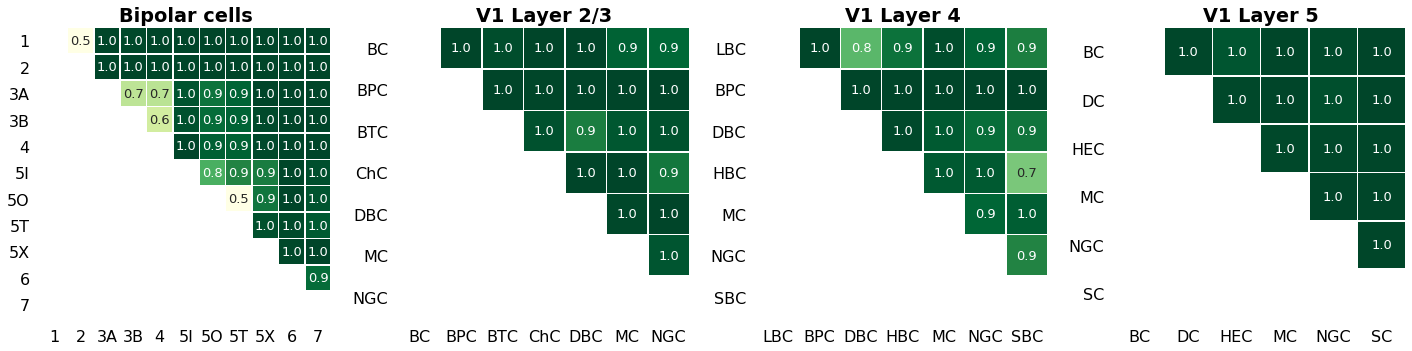

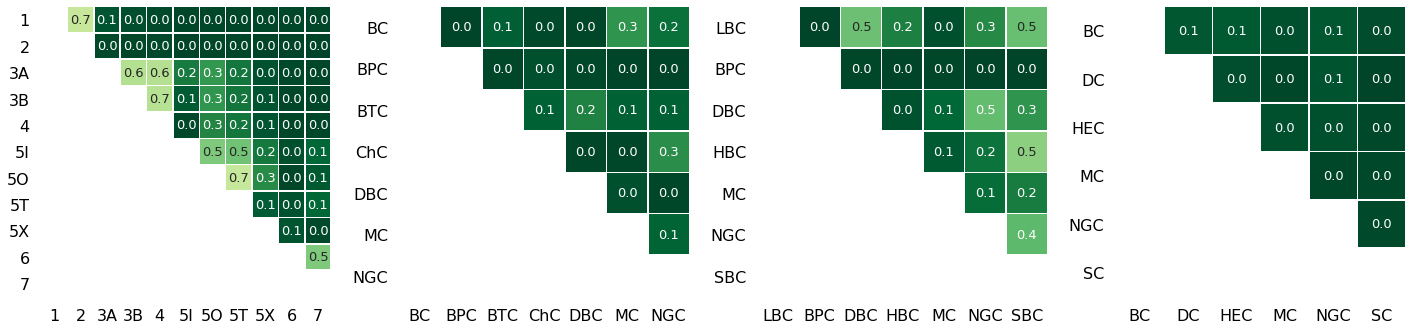

In [12]:
plt.figure(figsize=(20,5))
D = d_combined

## plot avg test accuracies
for k,i in enumerate([(1, 'Bipolar cells') ,(3,'V1 Layer 2/3'),(5,'V1 Layer 4'),(4, 'V1 Layer 5')]):
    
    plt.subplot(1,4,k+1)
    ds_idx = D['ds_id'] == i[0]
    plot_accuracy_matrix(D[ds_idx], score='accuracy',vmin=0.5, annot=True,
                         fmt='.1f',cbar=False)
    x_labels = plt.gca().get_xticklabels()
    if i[0] == 1:
        x_labels = [s.get_text().replace("CBC","") for s in x_labels]
        plt.gca().set_xticklabels(x_labels,rotation=0)
        plt.gca().set_yticklabels(x_labels, rotation=0)
    elif i[0] == 5:
        x_labels = [s.get_text().replace("HEC", "HBC").replace("SC","SBC") for s in x_labels]
        x_labels[0] = 'LBC'
        plt.gca().set_xticklabels(x_labels)
        plt.gca().set_yticklabels(x_labels, rotation=0)
    else:
        plt.gca().set_xticklabels(x_labels)
        plt.gca().set_yticklabels(x_labels, rotation=0)
    plt.gca().tick_params(axis='both', which='both', length=0)
    plt.title(i[1], weight='bold')
plt.tight_layout()

## plot avg test log-loss
plt.figure(figsize=(20,5))
for k,i in enumerate([1,3,5,4]):
    
    plt.subplot(1,4,k+1)
    ds_idx = D['ds_id'] == i
    plot_accuracy_matrix(D[ds_idx], score='log_loss', vmin=0, cmap='YlGn_r', annot=True, 
                        fmt='.1f', cbar=False)
    x_labels = plt.gca().get_xticklabels()
    if i == 1:
        x_labels = [s.get_text().replace("CBC","") for s in x_labels]
        plt.gca().set_xticklabels(x_labels, rotation=0)
        plt.gca().set_yticklabels(x_labels,rotation=0)
    elif i == 5:
        x_labels = [s.get_text().replace("HEC", "HBC").replace("SC","SBC") for s in x_labels]
        x_labels[0] = 'LBC'
        plt.gca().set_xticklabels(x_labels)
        plt.gca().set_yticklabels(x_labels, rotation=0)
            
    else:
        plt.gca().set_xticklabels(x_labels)
        plt.gca().set_yticklabels(x_labels, rotation=0)
    plt.gca().tick_params(axis='both', which='both', length=0)
plt.tight_layout()
